# Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from nltk.stem import SnowballStemmer

# Loading data

In [2]:
df1 = pd.read_csv('Twitter_Data.csv')
df2 = pd.read_csv('Reddit_Data.csv')

In [3]:
#shape of data
print(df1.shape)
print(df2.shape)

(162980, 2)
(37249, 2)


In [4]:
#printing some tweets with their category
print('twitter sentiment:\n')
print(df1.head(5))
print('\n\nreddit sentiment:\n')
print(df2.head(5))

twitter sentiment:

                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


reddit sentiment:

                                       clean_comment  category
0   family mormon have never tried explain them t...         1
1  buddhism has very much lot compatible with chr...         1
2  seriously don say thing first all they won get...        -1
3  what you have learned yours and only yours wha...         0
4  for your own benefit you may want read living ...         1


In [5]:
#checking sample
df1.loc[0]['clean_text']

'when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples'

# Checking Null values in both Data Frames

In [6]:
print('Twitter NULL:\n')
print(df1.isnull().sum())
print('\n\n\nReddit NULL:\n')
print(df2.isnull().sum())

Twitter NULL:

clean_text    4
category      7
dtype: int64



Reddit NULL:

clean_comment    100
category           0
dtype: int64


In [7]:
#checking columns
df1.columns

Index(['clean_text', 'category'], dtype='object')

In [8]:
#checking columns
df2.columns

Index(['clean_comment', 'category'], dtype='object')

# Dropping all the Null values

In [9]:

df1.dropna(inplace=True)
df2.dropna(inplace=True)

In [10]:
#checking Null value
print('Twitter NULL:\n')
print(df1.isnull().sum())
print('\n\n\nReddit NULL:\n')
print(df2.isnull().sum())

Twitter NULL:

clean_text    0
category      0
dtype: int64



Reddit NULL:

clean_comment    0
category         0
dtype: int64


In [11]:
df1.describe()

,category
count,162969.000000
mean,0.225442
std,0.781279
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [12]:
df2.describe()

,category
count,37149.000000
mean,0.203316
std,0.779491
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [13]:
#copying content to new row
df2['clean_text'] = df2['clean_comment']

In [14]:
df2.head()

,clean_comment,category,clean_text
0,family mormon have never tried explain them t...,1,family mormon have never tried explain them t...
1,buddhism has very much lot compatible with chr...,1,buddhism has very much lot compatible with chr...
2,seriously don say thing first all they won get...,-1,seriously don say thing first all they won get...
3,what you have learned yours and only yours wha...,0,what you have learned yours and only yours wha...
4,for your own benefit you may want read living ...,1,for your own benefit you may want read living ...


In [15]:
#dropping old row
df2 = df2.drop(['clean_comment'],axis=1)

# Merging two dataframes into one

In [16]:
df = df1.append(df2)

In [17]:
#checking shape of new data frame
df.shape

(200118, 2)

In [18]:
df.head()

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


# CountPlot

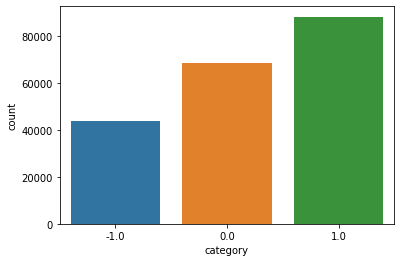

In [19]:
sns.countplot(df['category'])
plt.show()

# Cleaning the data

In [20]:
#stopwords english
stopwords = set(stopwords.words("english"))
#snowball stemmer
sno = SnowballStemmer('english')

In [21]:
#checking if this contain any html tags
for i in df['clean_text'].values:
    if(len(re.findall('<.*?>',i))):
        print(i)
        print('\n')

 It implies no html tags are included in text body

In [22]:
def cleanpunc(sentences):
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentences)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return cleaned

In [23]:
str = ' '
s = ' '
i = 0
final_string = []
for words in df['clean_text'].values:
    fil_wor = []
    for w in words.split():
        for cleanwords in cleanpunc(w).split():
            if (cleanwords.isalpha() and len(cleanwords) > 2):
                if(cleanwords.lower() not in stopwords):
                    s=(sno.stem(cleanwords.lower())).encode('utf8') #applying stemmer and converting the character to lowercase
                    fil_wor.append(s)
    str1 = b" ".join(fil_wor) #final string of cleaned words
    #print("***********************************************************************")
    
    final_string.append(str1)
    i+=1

In [24]:
#copying the column to exixsting dataset
df['CleanedText']=final_string #adding a column of CleanedText which displays the data after pre-processing of the review

In [25]:
df.head(5)

,clean_text,category,CleanedText
0,when modi promised “minimum government maximum...,-1.0,b'modi promis govern maximum expect begin diff...
1,talk all the nonsense and continue all the dra...,0.0,b'talk nonsens continu drama vote modi'
2,what did just say vote for modi welcome bjp t...,1.0,b'say vote modi welcom bjp told rahul main cam...
3,asking his supporters prefix chowkidar their n...,1.0,b'ask support prefix chowkidar name modi great...
4,answer who among these the most powerful world...,1.0,b'answer among power world leader today trump ...


In [26]:
df['category'] = df['category'].apply(int)

In [27]:
# df['CleanedText'] = df['CleanedText'].apply(str)

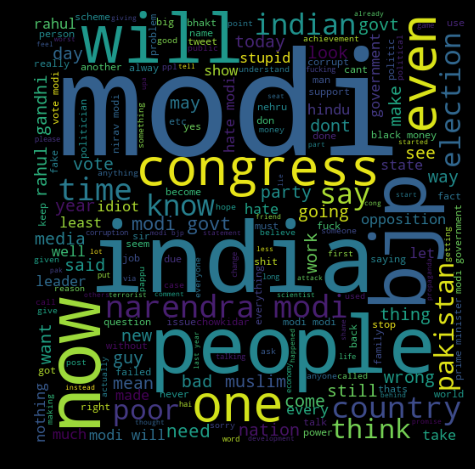

In [28]:
from wordcloud import WordCloud
negative_wor =  ' '.join(list(df[df['category'] == -1]['clean_text']))
negative_wc = WordCloud(width=512,height=512).generate(negative_wor)
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(negative_wc)
plt.show()

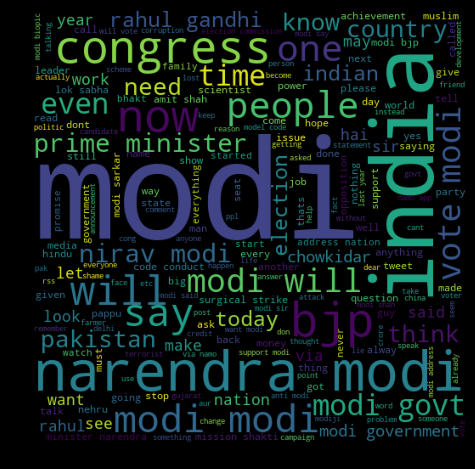

In [29]:
from wordcloud import WordCloud
negative_wor =  ' '.join(list(df[df['category'] == 0]['clean_text']))
negative_wc = WordCloud(width=512,height=512).generate(negative_wor)
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(negative_wc)
plt.show()

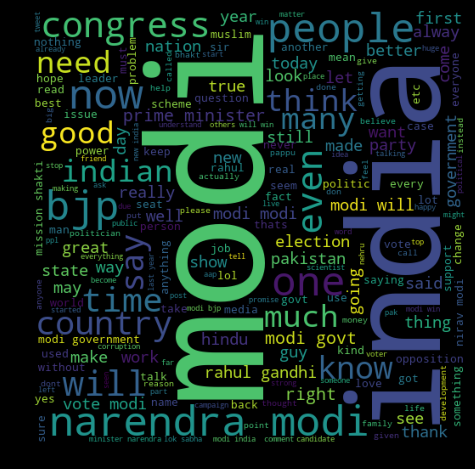

In [30]:
from wordcloud import WordCloud
negative_wor =  ' '.join(list(df[df['category'] == 1]['clean_text']))
negative_wc = WordCloud(width=512,height=512).generate(negative_wor)
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(negative_wc)
plt.show()

In [31]:
Y = df['category']
df = df.drop(['clean_text','category'],axis=1)

In [ ]:
from keras.preprocessing.text import Tokenizer
tkn = Tokenizer(nb_words=2000, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                                   lower=True,split=' ')

tkn.fit_on_texts(df['CleanedText'].values)
from keras.preprocessing.sequence import pad_sequences


X = tkn.texts_to_sequences(df['CleanedText'].values)
X = pad_sequences(X)